In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [2]:
mDay2020 = pd.read_csv('Flower_Varieties/MDay 2020 Flower Varieties.csv')
mDay2021 = pd.read_csv('Flower_Varieties/MDay 2021 Flower Varieties.csv')
mDay2022 = pd.read_csv('Flower_Varieties/MDay 2022 Flower Varieties.csv')
mDay2023 = pd.read_csv('Flower_Varieties/MDay 2023 Flower Varieties.csv')


In [3]:
file_names = ['Flower_Varieties/MDay 2020 Flower Varieties.csv', 'Flower_Varieties/MDay 2021 Flower Varieties.csv', 'Flower_Varieties/MDay 2022 Flower Varieties.csv', 'Flower_Varieties/MDay 2023 Flower Varieties.csv']

for file_name in file_names:
    # Load the data
    df = pd.read_csv(file_name)
    df['Total'] = df['Total'].replace(',', '')
    df['Total'] = df['Total'].replace('$', '')
    df['Total'] = pd.to_numeric(df['Total'])
    df['ASP'] = df['ASP'].replace(',', '')
    df['ASP'] = df['ASP'].replace('$', '')
    df['ASP'] = pd.to_numeric(df['ASP'])
    df['Volume'] = df['Volume'].replace({',': '', '$': ''}, regex=True)
    df['Volume'] = pd.to_numeric(df['Volume'])

    # Preprocess the 'Color' column
    df['Color'] = df['Color'].str.lower().str.strip()

    # Split the color data into multiple rows
    df = df.assign(Color=df['Color'].str.split('\n')).explode('Color')

    # Again strip whitespace after splitting
    df['Color'] = df['Color'].str.strip()

    # One-hot encode the color data
    encoded_colors = pd.get_dummies(df['Color'])

    # Combine the encoded color data with the original data
    df = pd.concat([df, encoded_colors], axis=1)

    print(df.head())  # Print the first few rows of the DataFrame to check the result


  Master SKU                 Name   Image   Color  \
0      20-S1  Pop of Color Bouquet    NaN    pink   
0      20-S1  Pop of Color Bouquet    NaN  orange   
0      20-S1  Pop of Color Bouquet    NaN   peach   
0      20-S1  Pop of Color Bouquet    NaN   peach   
0      20-S1  Pop of Color Bouquet    NaN   green   

                                           Varieties  Volume  Total  ASP  \
0  Carnations\nRoses\nStock\nSpray Roses\nFuji Mu...     NaN    NaN  NaN   
0  Carnations\nRoses\nStock\nSpray Roses\nFuji Mu...     NaN    NaN  NaN   
0  Carnations\nRoses\nStock\nSpray Roses\nFuji Mu...     NaN    NaN  NaN   
0  Carnations\nRoses\nStock\nSpray Roses\nFuji Mu...     NaN    NaN  NaN   
0  Carnations\nRoses\nStock\nSpray Roses\nFuji Mu...     NaN    NaN  NaN   

   green  hot pink  ivory  lavender  orange  pale pink  peach   pink  purple  \
0  False     False  False     False   False      False  False   True   False   
0  False     False  False     False    True      False  False  F

In [4]:
# Calculate and print the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print(f"Correlation matrix for Mother's Day:\n", correlation_matrix['ASP'])
print(f"Correlation matrix for Mother's Day:\n", correlation_matrix['Total'])
print(f"Correlation matrix for Mother's Day:\n", correlation_matrix['Volume'])



Correlation matrix for Mother's Day:
 Volume       -0.523171
Total        -0.400352
ASP           1.000000
blue               NaN
green         0.324062
hot pink     -0.234121
ivory              NaN
lavender     -0.196139
light pink    0.292929
orange       -0.098389
pale pink    -0.021341
peach        -0.016089
pink         -0.025750
purple       -0.131756
red          -0.030487
white         0.174625
yellow       -0.024270
Name: ASP, dtype: float64
Correlation matrix for Mother's Day:
 Volume        0.986970
Total         1.000000
ASP          -0.400352
blue               NaN
green        -0.276465
hot pink      0.270770
ivory              NaN
lavender      0.185705
light pink   -0.125610
orange        0.371278
pale pink    -0.173143
peach         0.039648
pink         -0.107820
purple        0.240438
red          -0.247348
white        -0.320030
yellow        0.196516
Name: Total, dtype: float64
Correlation matrix for Mother's Day:
 Volume        1.000000
Total         0.986970
ASP 

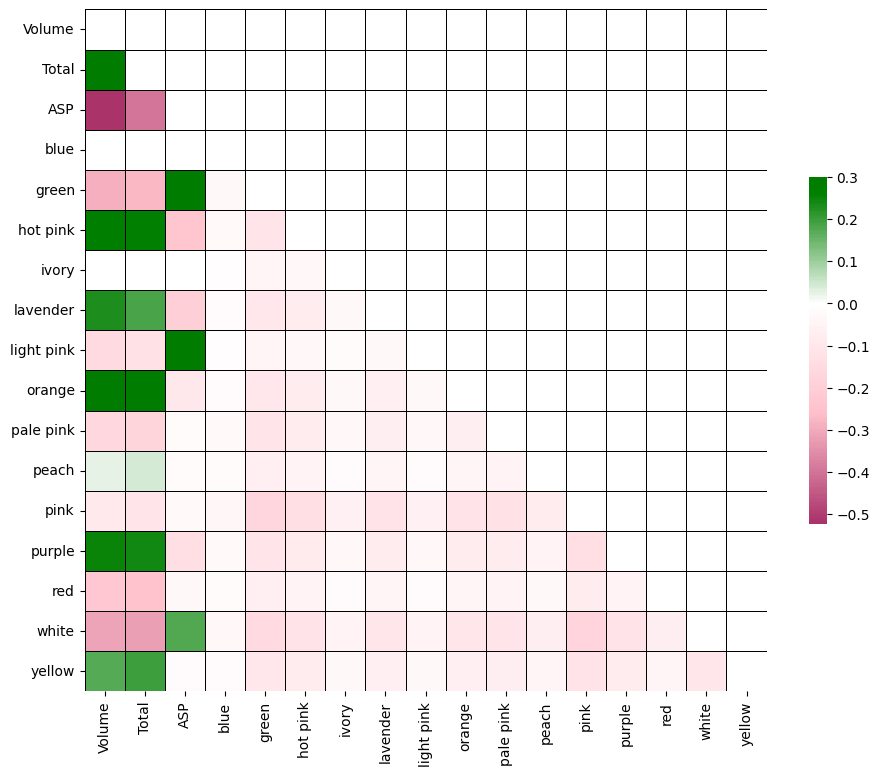

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Assuming df is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Define the colors for the gradient colormap
colors = ['#AA336A', 'pink', 'white', 'green', 'darkgreen']

# Create a custom colormap with a gradient
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the custom colormap
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, linecolor='black')

plt.show()


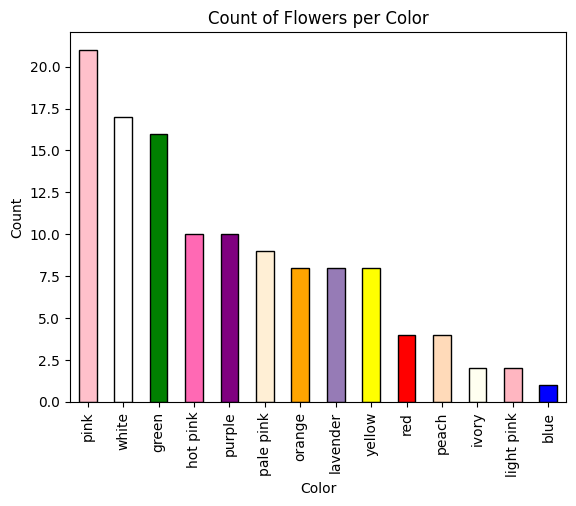

In [6]:
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#FFDAB9',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#0000FF',
    'ivory': '#FFFFF0'
}

color_counts = df['Color'].value_counts()
color_names = color_counts.index

# Plot the bar chart with custom colors and outline
color_counts.plot(kind='bar', color=[custom_colors.get(c, 'gray') for c in color_names], edgecolor='black')

plt.title('Count of Flowers per Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()



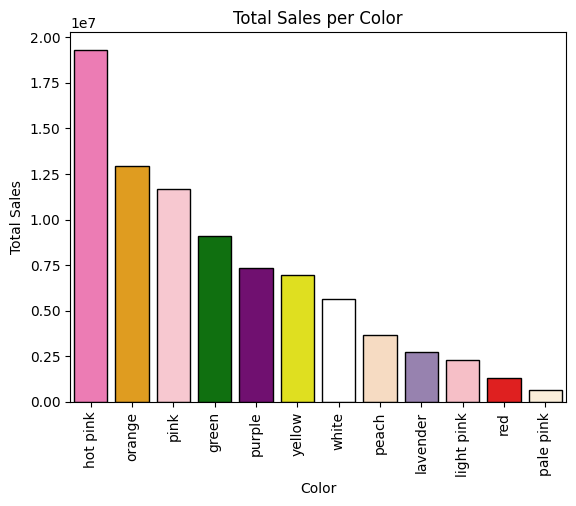

In [7]:
color_sales = df.groupby('Color')['Total'].sum().sort_values(ascending=False)

# Filter out colors with 0 sales
color_sales = color_sales[color_sales != 0]

# Create the bar plot with custom colors and edgecolor
sns.barplot(x=color_sales.index, y=color_sales.values, palette=[custom_colors.get(c, 'gray') for c in color_sales.index], edgecolor='black')

plt.title('Total Sales per Color')
plt.xlabel('Color')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


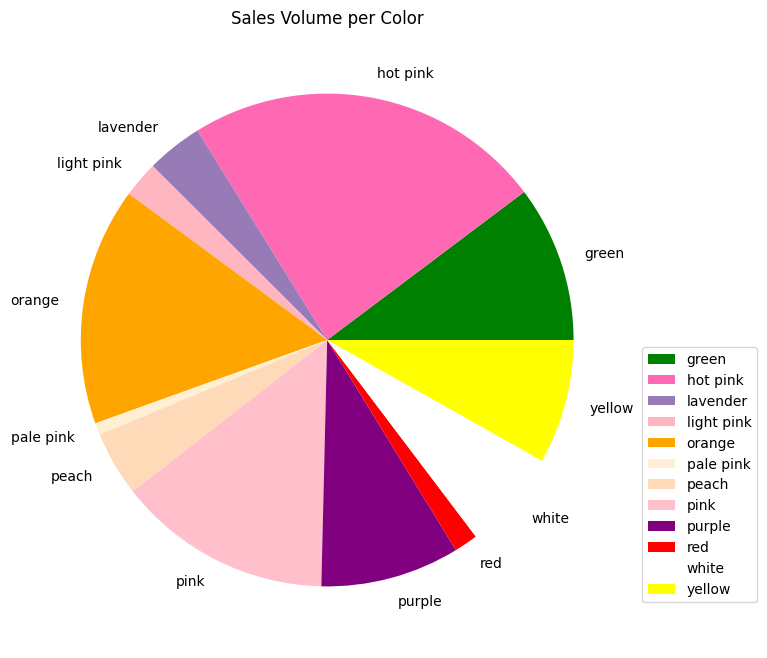

In [8]:
color_volume = df.groupby('Color')['Volume'].sum()

# Filter out colors with 0 sales volume
color_volume = color_volume[color_volume != 0]

# Create the pie chart with custom colors
custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
colors = [custom_colors[color] for color in color_volume.index]

# Adjust the figure size
plt.figure(figsize=(12,8))

# Create the pie chart with updated colors
patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors)

plt.title('Sales Volume per Color')

# Position the legend outside the chart area
plt.legend(patches, color_volume.index, bbox_to_anchor=(1, 0.5), loc='best')

plt.show()


NameError: name 'autotexts' is not defined

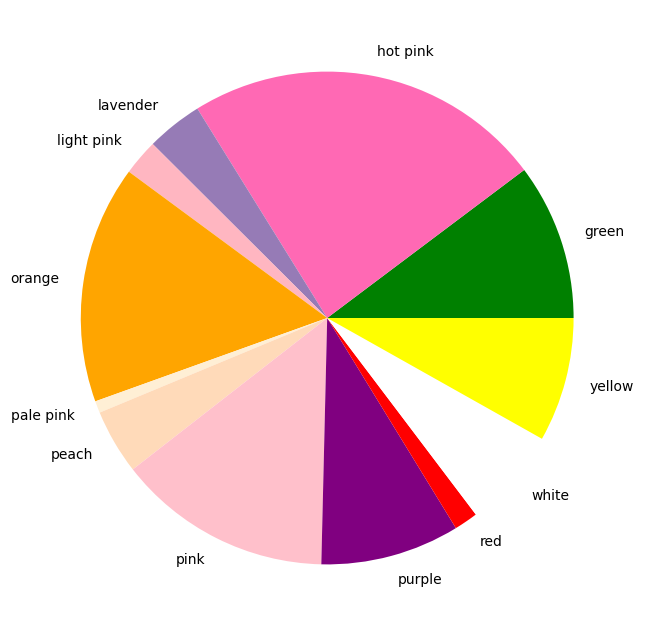

In [9]:
color_volume = df.groupby('Color')['Volume'].sum()

# Filter out colors with 0 sales volume
color_volume = color_volume[color_volume != 0]

# Create the pie chart with custom colors
custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
colors = [custom_colors[color] for color in color_volume.index]

# Adjust the figure size
plt.figure(figsize=(12,8))

# Create the pie chart with updated colors
patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors)

# Adjust the font size of percentage labels
for autotext in autotexts:
    autotext.set_fontsize(10)

plt.title('Sales Volume per Color')

# Position the legend outside the chart area
plt.legend(patches, color_volume.index, bbox_to_anchor=(1, 0.5), loc='best')

plt.show()


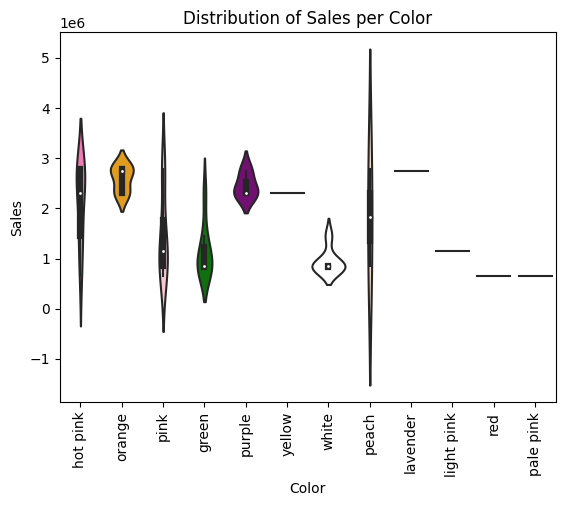

In [ ]:
# Create the violin plot
sns.violinplot(x=df['Color'], y=df['Total'], order=color_sales.index, palette=[custom_colors.get(c, 'gray') for c in color_sales.index])

# Set the title and labels
plt.title('Distribution of Sales per Color')
plt.xlabel('Color')
plt.ylabel('Sales')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [ ]:
# Create a copy of the DataFrame with split and one-hot encoded varieties
df_varieties = df.copy()
df_varieties = df_varieties.assign(Varieties=df_varieties['Varieties'].str.lower().str.split('\n')).explode('Varieties')
encoded_varieties = pd.get_dummies(df_varieties['Varieties'])
df_varieties = pd.concat([df_varieties, encoded_varieties], axis=1)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


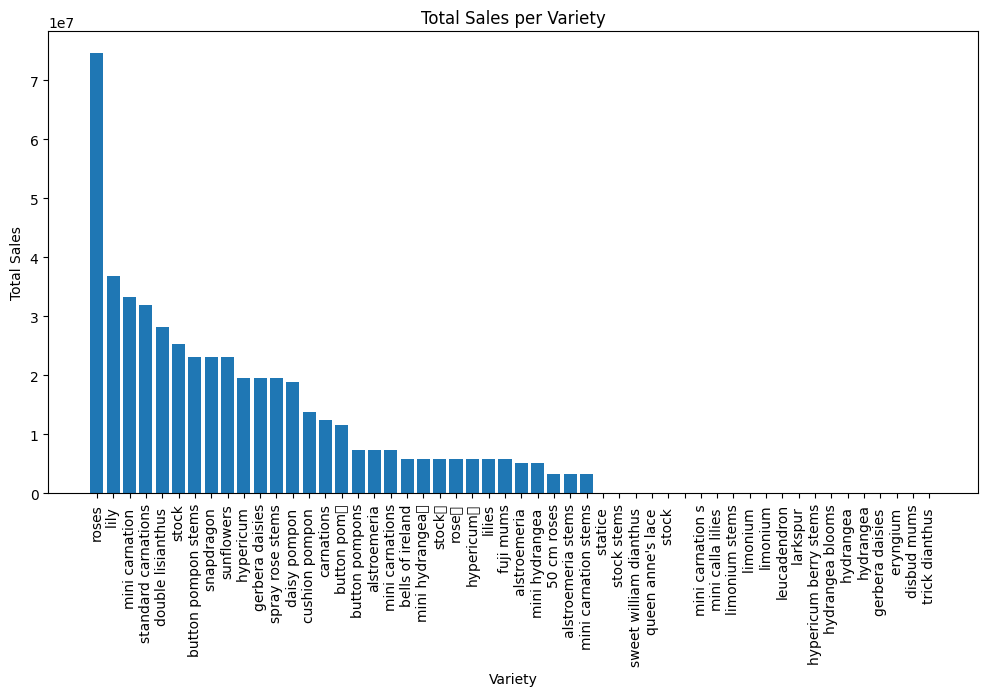

In [ ]:
# Calculate total sales per variety
varieties_sales = df_varieties.groupby('Varieties')['Total'].sum().sort_values(ascending=False)

# Create a bar plot for total sales per variety
plt.figure(figsize=(12, 6))
plt.bar(varieties_sales.index, varieties_sales.values)
plt.title('Total Sales per Variety')
plt.xlabel('Variety')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


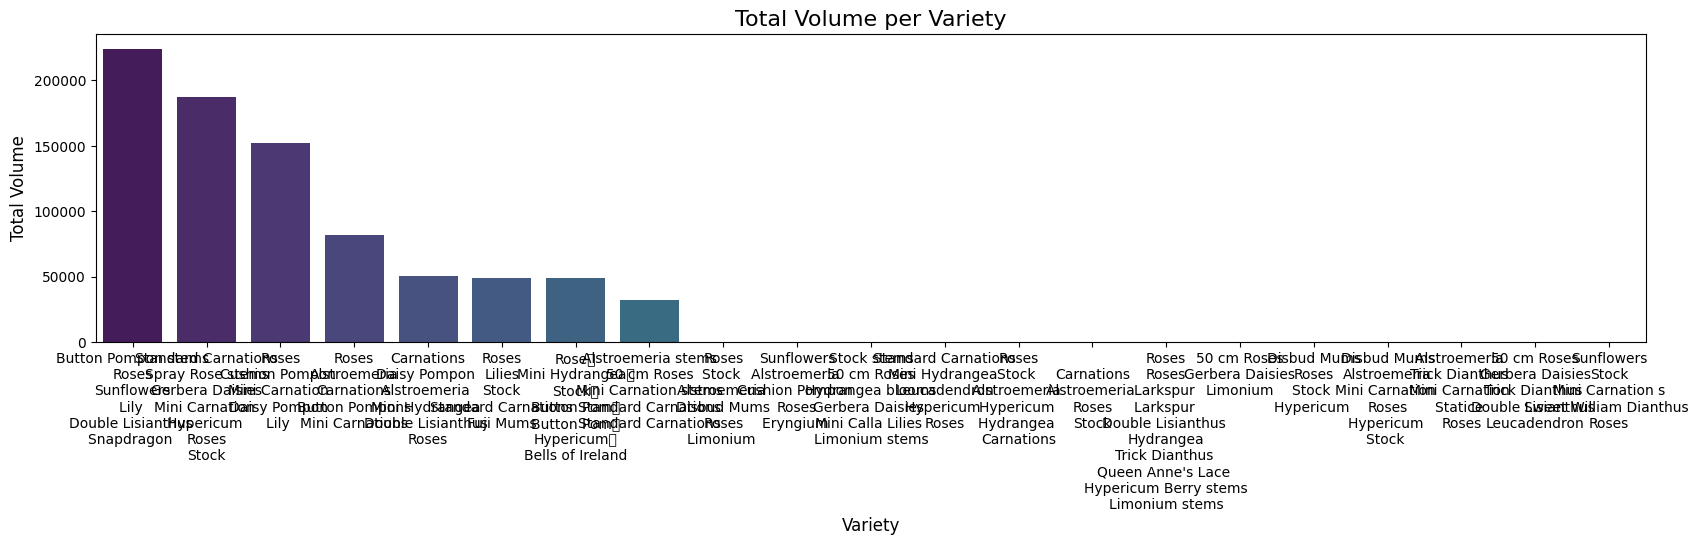

In [ ]:
# Calculate the total volume per variety
volume_per_variety = df.groupby('Varieties')['Volume'].sum().sort_values(ascending=False)

# Set up the figure with increased size
fig, ax = plt.subplots(figsize=(20, 4))

# Create a bar plot for volume per variety
sns.barplot(x=volume_per_variety.index, y=volume_per_variety.values, palette='viridis', ax=ax)

# Rotate x-axis labels
ax.set_xticklabels(volume_per_variety.index, rotation=0)

# Set title and labels with increased font size
plt.title('Total Volume per Variety', fontsize=16)
plt.xlabel('Variety', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


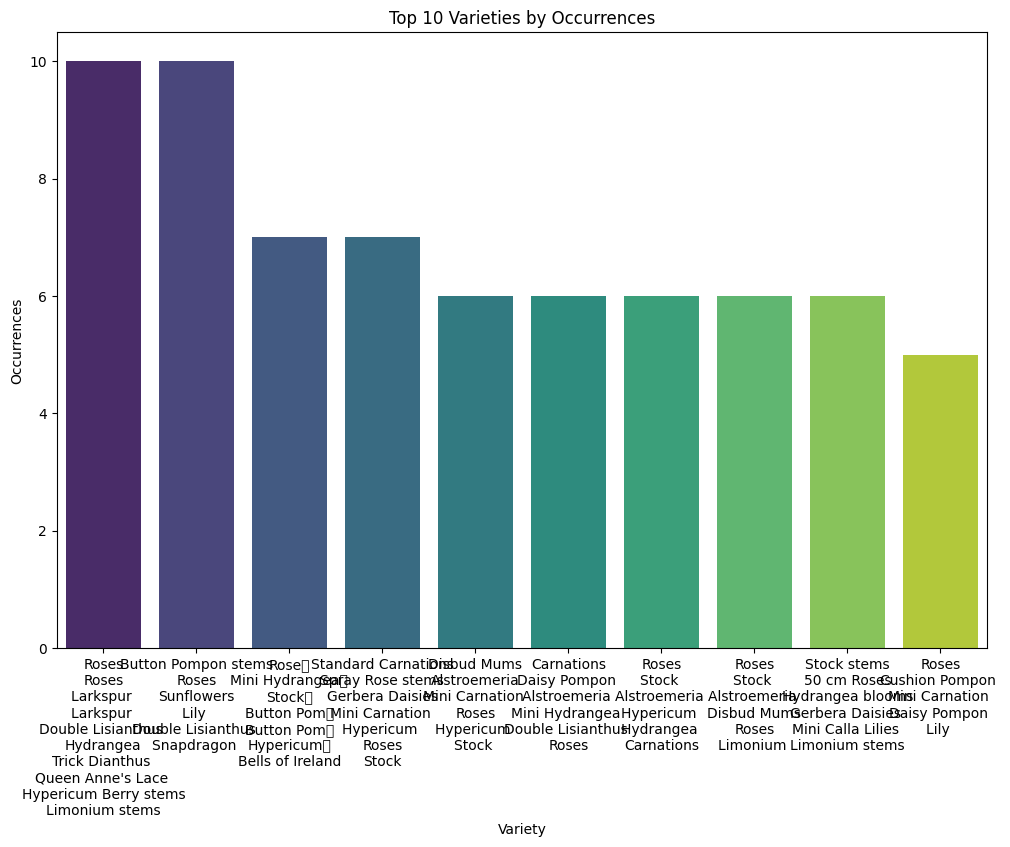

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each variety
variety_counts = df['Varieties'].value_counts()

# Select the top 10 varieties
top_varieties = variety_counts.head(10)

# Create a bar plot for the top 10 varieties
plt.figure(figsize=(12, 8))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette='viridis')

# Set title and labels
plt.title('Top 10 Varieties by Occurrences')
plt.xlabel('Variety')
plt.ylabel('Occurrences')
plt.xticks(rotation=0)

plt.show()


In [ ]:
import re
# Get a list of all Excel files in the directory
excel_files = [f for f in os.listdir('Recipes/') if f.endswith('.xlsx')]

# Specify your new directory
new_dir = './csv_files/'

# Create the new directory if it doesn't exist
os.makedirs(new_dir, exist_ok=True)
for excel_file in excel_files:
    # Extract the year from the file name using regular expressions
    year_match = re.search(r'\d{4}', excel_file)  # Looks for four digits in a row
    year = year_match.group() if year_match else 'unknown'

    # Load spreadsheet
    xl = pd.ExcelFile(os.path.join('Recipes/', excel_file), engine='openpyxl')

    # Load a sheet into a DataFrame by its name
    for sheet_name in xl.sheet_names:
        df = xl.parse(sheet_name)
        df = df.iloc[:, :10]

        # Write DataFrame to a CSV file with year prefix in the specified directory
        df.to_csv(new_dir + f'{year}_{sheet_name}.csv', index=False)

# Get a list of all CSV files in the new directory
csv_files = [f for f in os.listdir(new_dir) if f.endswith('.csv')]

# Read each CSV file and store the data in a dictionary
data = {}
for csv_file in csv_files:
    data[csv_file] = pd.read_csv(new_dir + csv_file)

In [ ]:
# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir('csv_files/') if f.endswith('.csv')]

# Separate 'Floral Cost.csv' and 'Hardgood Costs.csv' from the other CSV files
arrangement_csv_files = [f for f in csv_files if f not in ['2024_Floral Costs.csv', '2024_Hardgood Costs.csv']]

# Create separate dictionaries for floral cost, hardgood costs, and other data
floral_costs_data = {}
hardgood_costs_data = {}
data = {}

# Process 'Floral Cost.csv' and 'Hardgood Costs.csv'
for csv_file in ['2024_Floral Costs.csv', '2024_Hardgood Costs.csv']:
    df = pd.read_csv('csv_files/' + csv_file, header=None)  # No header
    # Store the data in the appropriate dictionary
    if csv_file == '2024_Floral Costs.csv':
        floral_costs_data[csv_file] = df
    else:
        hardgood_costs_data[csv_file] = df

# Process the remaining CSV files
for csv_file in arrangement_csv_files:
    df = pd.read_csv('csv_files/' + csv_file, header=None)
    df.columns = ['Colors', 'Flowers', 'SQty', 'SPrice', 'DQty','DPrice','PQty','PPrice','EQty','EPrice']
    df = df.iloc[23:36]
    data[csv_file] = df


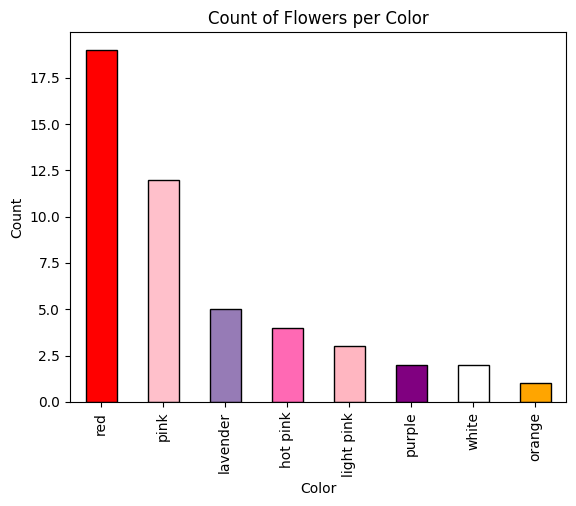

In [ ]:
# Concatenate all dataframes in the dictionary into a single dataframe
# Create a new column 'Arrangement' which is the key in the dictionary
all_data = pd.concat([df.assign(Arrangement=os.path.splitext(name)[0]) for name, df in data.items()])


# Convert the color names to lowercase
all_data['Colors'] = all_data['Colors'].str.lower()
all_data['Colors'] = all_data['Colors'].str.strip()
# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Count the number of flowers per color
color_counts = all_data['Colors'].value_counts()
color_names = color_counts.index

# Plot the bar chart with custom colors and outline
color_counts.plot(kind='bar', color=[custom_colors.get(c, 'gray') for c in color_names], edgecolor='black')

plt.title('Count of Flowers per Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()


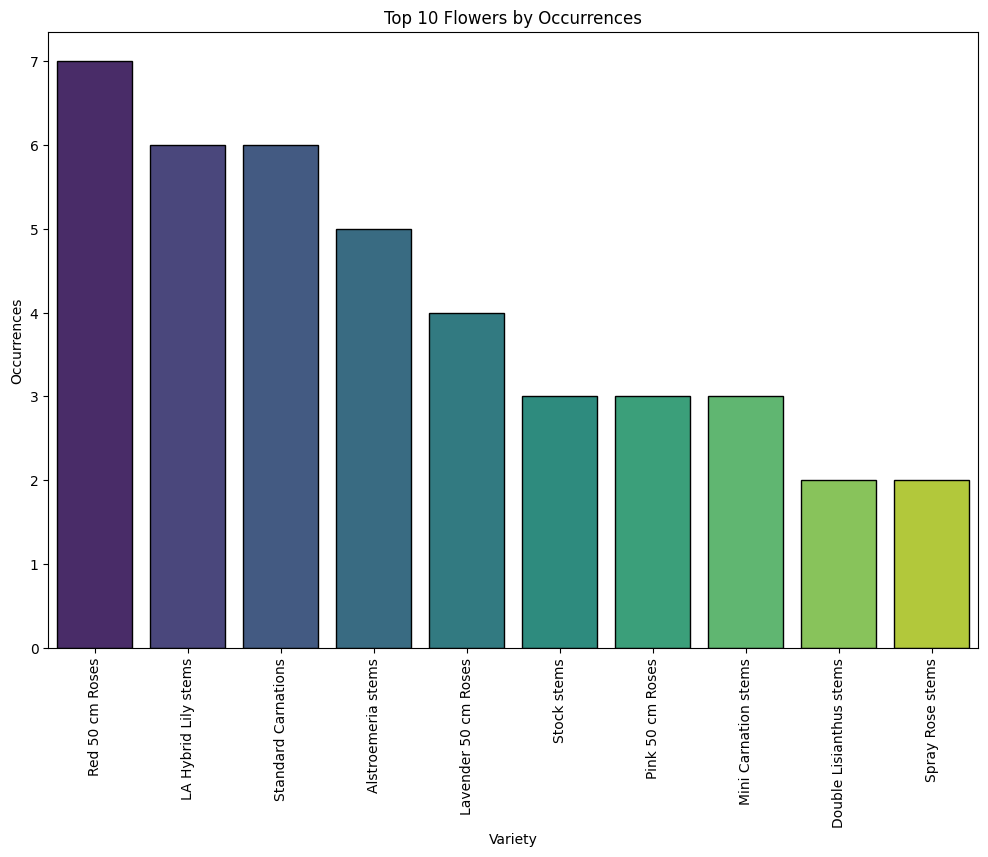

In [ ]:
# Remove rows where 'Colors' is NaN
all_data = all_data[all_data['Colors'].notna()]

# Count the occurrences of each flower variety
variety_counts = all_data['Flowers'].value_counts()

# Select the top 10 varieties
top_varieties = variety_counts.head(10)

# Create a bar plot for the top 10 varieties
plt.figure(figsize=(12, 8))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette='viridis', edgecolor='black')

# Set title and labels
plt.title('Top 10 Flowers by Occurrences')
plt.xlabel('Variety')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()


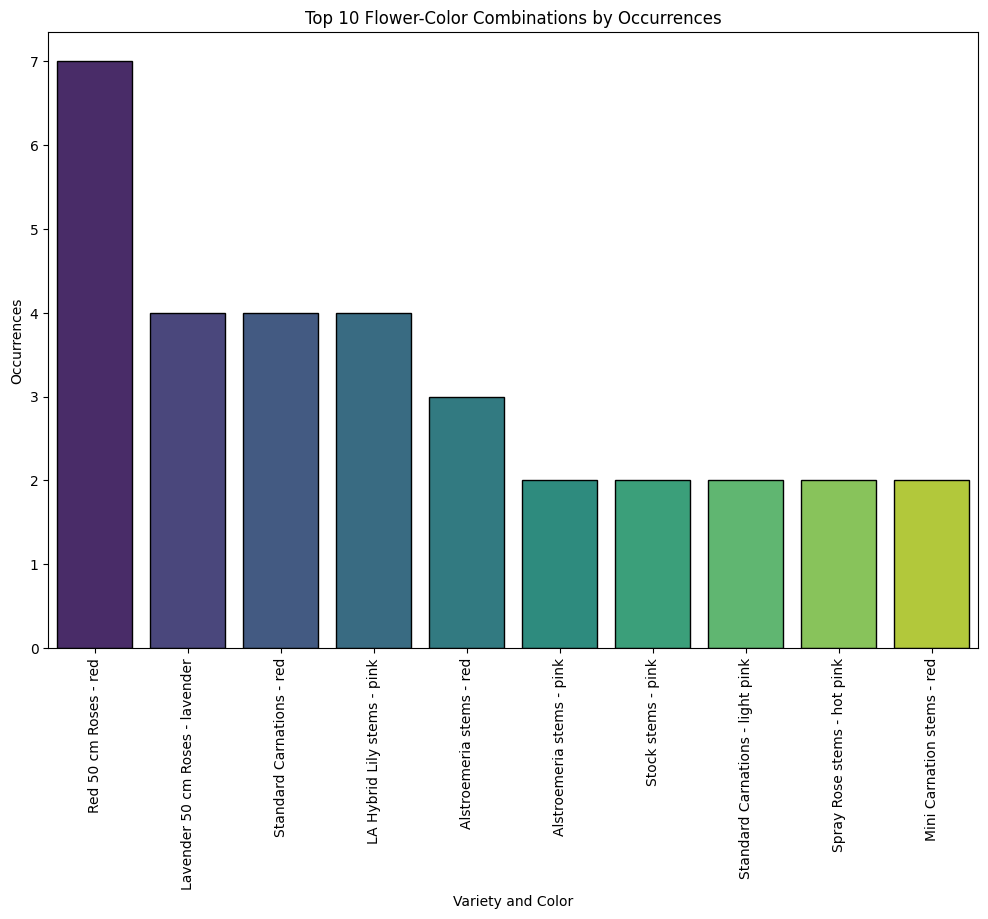

In [ ]:
# Remove rows where 'Colors' is NaN
all_data = all_data[all_data['Colors'].notna()]

# Count the occurrences of each unique combination of 'Flowers' and 'Colors'
variety_color_counts = all_data.groupby(['Flowers', 'Colors']).size()

# Select the top 10 combinations
top_varieties_colors = variety_color_counts.sort_values(ascending=False).head(10)

# Convert the MultiIndex to a single index by joining the levels with a separator
top_varieties_colors.index = top_varieties_colors.index.map(' - '.join)

# Create a bar plot for the top 10 combinations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_varieties_colors.index, y=top_varieties_colors.values, palette='viridis', edgecolor='black')

# Set title and labels
plt.title('Top 10 Flower-Color Combinations by Occurrences')
plt.xlabel('Variety and Color')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()


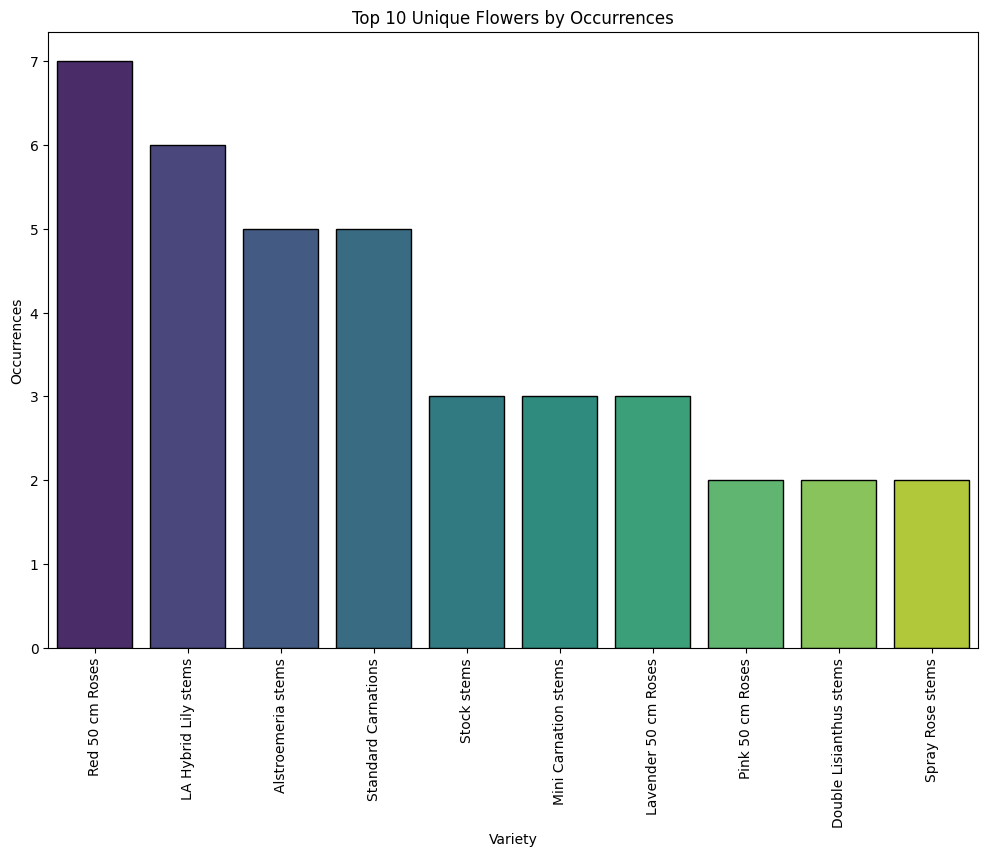

In [ ]:
# Drop duplicates based on 'Arrangement' and 'Flowers'
all_data_unique_flowers = all_data.drop_duplicates(subset=['Arrangement', 'Flowers'])

# Count the occurrences of each 'Flowers' type
variety_counts = all_data_unique_flowers['Flowers'].value_counts()

# Select the top 10 varieties
top_varieties = variety_counts.head(10)

# Create a bar plot for the top 10 varieties
plt.figure(figsize=(12, 8))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette='viridis', edgecolor='black')

# Set title and labels
plt.title('Top 10 Unique Flowers by Occurrences')
plt.xlabel('Variety')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()


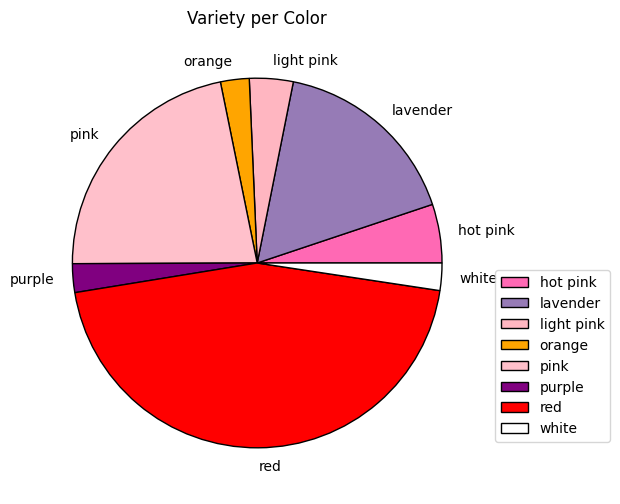

In [ ]:
all_data['Colors'] = all_data['Colors'].str.lower()
all_data['Colors'] = all_data['Colors'].str.strip()
# Remove rows with NaN values in the 'Colors' column
all_data = all_data[all_data['Colors'].notna()]

# Convert the quantity columns to numeric
for col in ['SQty', 'DQty', 'PQty', 'EQty']:
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')

# Calculate the total volume for each color
color_volume = all_data.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

# Filter out colors with 0 sales volume
color_volume = color_volume[color_volume != 0]

# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Create the pie chart with custom colors
custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
colors = [custom_colors[color] for color in color_volume.index]

# Adjust the figure size
plt.figure(figsize=(12,8))

# Create the pie chart with updated colors
patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})


plt.title('Variety per Color')

# Position the legend outside the chart area
plt.legend(patches, color_volume.index, bbox_to_anchor=(1, 0.5), loc='best')

plt.show()


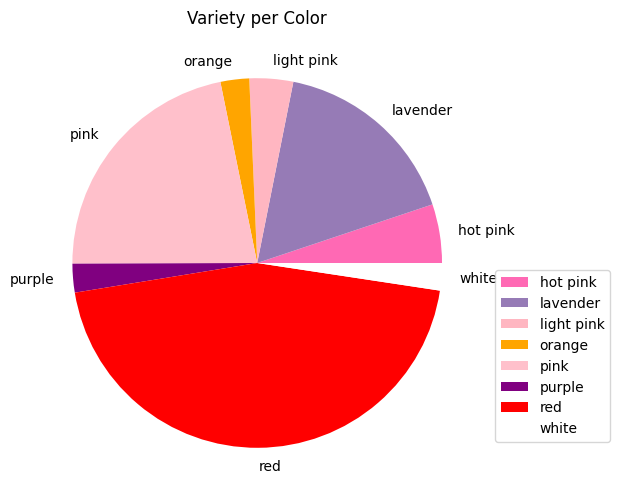

In [ ]:
# Convert the quantity columns to numeric
for col in ['SQty', 'DQty', 'PQty', 'EQty']:
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')

# Calculate the total volume for each color
color_volume = all_data.groupby('Colors')[['SQty', 'DQty', 'PQty', 'EQty']].sum().sum(axis=1)

# Filter out colors with 0 sales volume
color_volume = color_volume[color_volume != 0]

# Define the custom colors
custom_colors = {
    'hot pink': '#FF69B4',
    'orange': '#FFA500',
    'pink': '#FFC0CB',
    'green': '#008000',
    'purple': '#800080',
    'yellow': '#FFFF00',
    'white': '#FFFFFF',
    'peach': '#ffcba4',
    'lavender': '#967bb6',
    'light pink': '#FFB6C1',
    'red': '#FF0000',
    'pale pink': '#FFEFD5',
    'blue': '#8EA5C5',
    'ivory': '#f5f5dc'
}

# Create the pie chart with custom colors
custom_colors = {color: custom_colors.get(color, 'gray') for color in color_volume.index}
colors = [custom_colors[color] for color in color_volume.index]

# Adjust the figure size
plt.figure(figsize=(12,8))

# Create the pie chart with updated colors
patches, texts = plt.pie(color_volume.values, labels=color_volume.index, colors=colors)


plt.title('Variety per Color')

# Position the legend outside the chart area
plt.legend(patches, color_volume.index, bbox_to_anchor=(1, 0.5), loc='best')

plt.show()
